INTRODUCTION

**Exports and Imports of India(1997-2022)**
Dataset gives the glimpse of India's export and import from 1997-2022.

Even before independence, the Government of India maintained semi-autonomous diplomatic relations. It had colonies (such as the Aden Settlement), who sent and received full missions, and was a founder member of both the League of Nations and the United Nations. After India gained independence from the United Kingdom in 1947, it soon joined the Commonwealth of Nations and strongly supported independence movements in other colonies, like the Indonesian National Revolution. The partition and various territorial disputes, particularly that over Kashmir, would strain its relations with Pakistan for years to come. During the Cold War, India adopted a foreign policy of non-alignment policy itself with any major power bloc. However, India developed close ties with the Soviet Union and received extensive military support from it.

1991 economic reform
Prior to the 1991 economic liberalization, India was a closed economy due to the average tariffs exceeding 200 percent and the extensive quantitative restrictions on imports. Foreign investment was strictly restricted to only allow Indian ownership of businesses. Since the liberalization, India's economy has improved mainly due to increased foreign trade.

Trade in services
India was the eighth largest exporter of commercial services in the world in 2016, accounting for 3.4% of global trade in services. India recorded a 5.7% growth in services trade in 2016.

PS:- You can find the dataset in dataset/ folder but im also providing kaggle link for the problem
https://www.kaggle.com/datasets/ramjasmaurya/exports-and-imports-of-india19972022?datasetId=1980982


In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path_to_dataset = r"E:\Neeshu\kaggle-practice\datasets\exports and imports of india(1997-2022) - exports and imports.csv"

In [3]:
df = pd.read_csv(path_to_dataset)

# converting all columns in lowercase ans stripping extra white space
# data cleaning process
df.columns = map(str.lower, df.columns)

# need to do this as we can 1,123.34 as values need to convert them to float so that i can add up those values
df["total trade"] = df["total trade"].apply(lambda x : float(str(x).replace(",","").strip()))
df["export"] = df["export"].apply(lambda x : float(str(x).replace(",","").strip()))
df["import"] = df["import"].apply(lambda x : float(str(x).replace(",","").strip()))

# our data also have NaN values, nee to replace all NaN with 0
df['total trade'] = df['total trade'].replace(np.nan, 0)
df['export'] = df['export'].replace(np.nan, 0)
df['import'] = df['import'].replace(np.nan, 0)

print(df.columns)
print(df.shape)
print(len(df["country"].unique()))


Index(['country', 'export', 'import', 'total trade', 'trade balance',
       'year(start)', 'year(end)'],
      dtype='object')
(5767, 7)
250


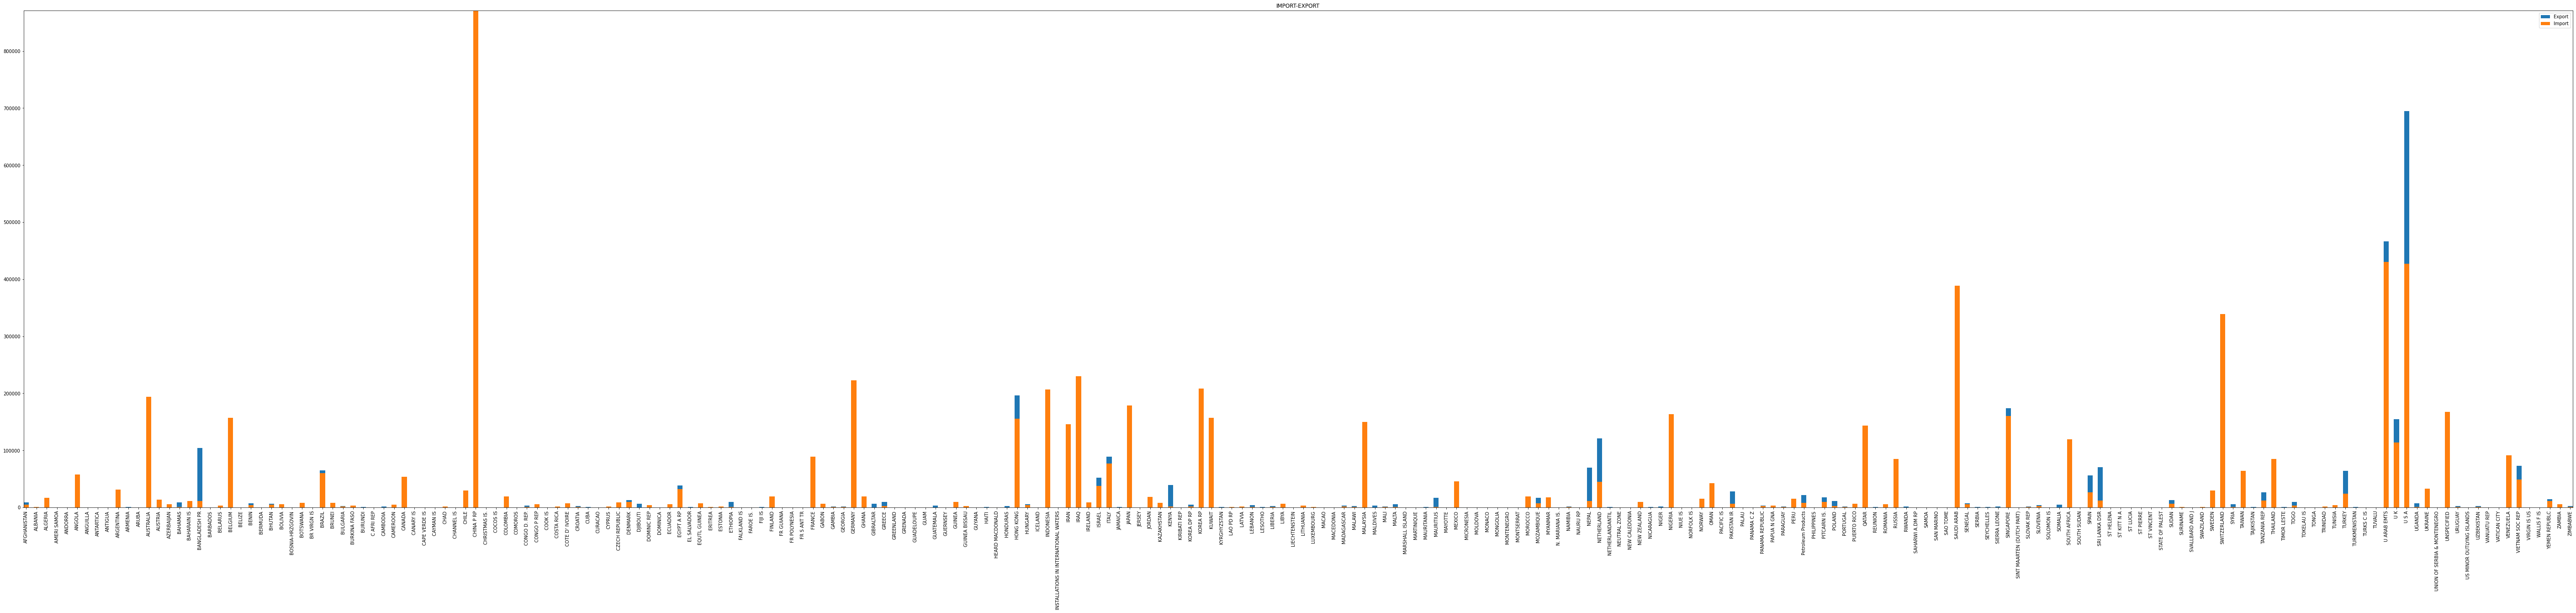

In [53]:
# This section will cover plotting each 250 countries with their number of exports and imports with India

fig = plt.figure(figsize=(100,20))
ax1 = fig.add_subplot(111)

country_name_data = []
export_data = []
import_data = []

df_group = df.groupby('country')

# getting country names on x - axis
country_name_data = df["country"].unique().tolist()

# getting total trade value on y -axis
for country_name,country_data in df_group:
    export_data.append(round(sum(country_data["export"]),3))
    import_data.append(round(sum(country_data["import"]),3))
    
# 1st bar chart for country-export/import
ax1.bar(country_name_data, export_data, width=0.5, label = 'Export')
ax1.bar(country_name_data, import_data, width=0.5, label = 'Import')
ax1.margins(x=0)
ax1.set_xticks(country_name_data)
ax1.xaxis.set_tick_params(rotation=90)

plt.legend()
min_ylim = min(min(export_data),min(import_data))
max_ylim = max(max(export_data),max(import_data))
plt.ylim(min_ylim,max_ylim+1000)
plt.title("IMPORT-EXPORT")
plt.show()



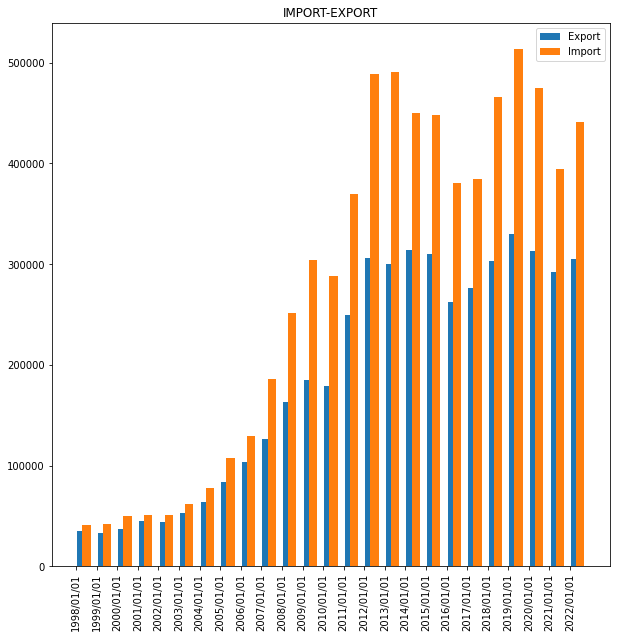

In [5]:
# This section will cover plotting bar chart for import and export of India over given years
from datetime import datetime
import matplotlib.dates as dates

# 2nd bar chart for year-export/import 
fig2 = plt.figure(figsize=(10,10))
ax2 = fig2.add_subplot(111)

df_group = df.groupby('year(end)')

year_data = []
export_data = []
import_data = []

# getting total trade value on y -axis
for year,country_data in df_group:
    year = str(year)
    if year.startswith("9"):
        year = "19"+year
    if year not in year_data:
        year_data.append(datetime.strptime(str(year),"%Y").strftime("%Y/%m/%d"))
    export_data.append(round(sum(country_data["export"]),3))
    import_data.append(round(sum(country_data["import"]),3))


X_axis = np.arange(len(year_data))

ax2.bar(X_axis+0.25, export_data, width=0.4, label = 'Export')
ax2.bar(X_axis+0.25*2, import_data, width=0.4, label = 'Import')

plt.xticks(X_axis,year_data,rotation=90)
plt.title("IMPORT-EXPORT")
plt.legend()
plt.show()



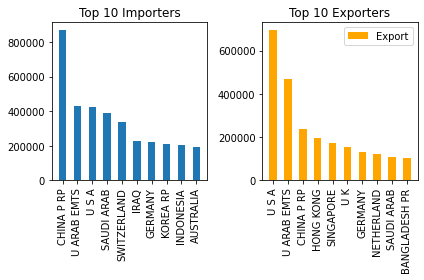

In [49]:
# top 10 importer and exporter countries
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


# getting summarized data from pandas aggregation function , set as_index=False to include other columns also 
df_group = df.groupby("country", as_index=False).agg(
    total_imports=pd.NamedAgg(column="import", aggfunc="sum"),
    total_exports=pd.NamedAgg(column="export", aggfunc="sum"),
)

# sorting total_imports in decreasing order , i.e getting max imports form country on index 0
df_top_import = df_group.sort_values(by=['total_imports'], ascending=False)
df_top_import = df_top_import[:10]

x_import_country = df_top_import["country"].tolist()
y_import_data = df_top_import["total_imports"].tolist()

# sorting total_exports in decreasing order , i.e getting max imports form country on index 0
df_top_export = df_group.sort_values(by=['total_exports'], ascending=False)
df_top_export = df_top_export[:10]

x_export_country = df_top_export["country"].tolist()
y_export_data = df_top_export["total_exports"].tolist()

ax1.bar(x_import_country,y_import_data,width=0.5,label="Import")
ax2.bar(x_export_country,y_export_data,width=0.5,label="Export",color='orange')

ax1.set_title("Top 10 Importers")
ax2.set_title("Top 10 Exporters")

ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)

plt.legend()
# plt.xticks(rotation=90)
plt.tight_layout() # for proper spacing between two subplots
plt.show()




**CONCLUSION**

Please feel free to contact for any update/suggestion or discussion

Mailid :- neeshuagg15@gmail.com
